<a href="https://colab.research.google.com/github/fboldt/aulasann/blob/plan/single_hidden_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

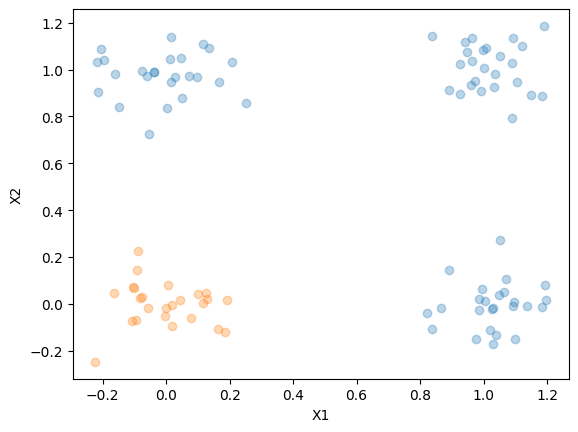

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def criaDataset(n=100, func=lambda a, b: bool(a) or bool(b)):
    X, y = make_blobs(n_samples=n, centers=[[0,0],[1,0],[1,1],[0,1]], cluster_std=0.1)
    y = (np.array([func(x[0]>0.5, x[1]>0.5) for x in X], dtype=int)) * 2 -1
    return X, y

X, y = criaDataset()

def plotDataset(X, y):
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

plotDataset(X, y)

In [2]:
def sign(a):
  return (a > 0) * 2 - 1

In [3]:
from sklearn.base import BaseEstimator, ClassifierMixin

def include_bias(X):
  bias = np.ones((X.shape[0], 1))
  Xb = np.concatenate((bias, X), axis=1)
  return Xb

class ClassificadorOR(BaseEstimator, ClassifierMixin):
  def fit(self, X, y):
    pass
  def predict(self, X):
    w = [-0.5, 1, 1]
    Xb = include_bias(X)
    return sign(Xb @ w)

In [4]:
def defineAxes(X):
    offset = 0.5
    min1, max1 = X[:, 0].min(), X[:, 0].max()
    min2, max2 = X[:, 1].min(), X[:, 1].max()
    return [min1-offset, max1+offset, min2-offset, max2+offset]

def plotPredictions(clf, X):
    axes = defineAxes(X)
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

In [5]:
from sklearn.metrics import accuracy_score

1.0

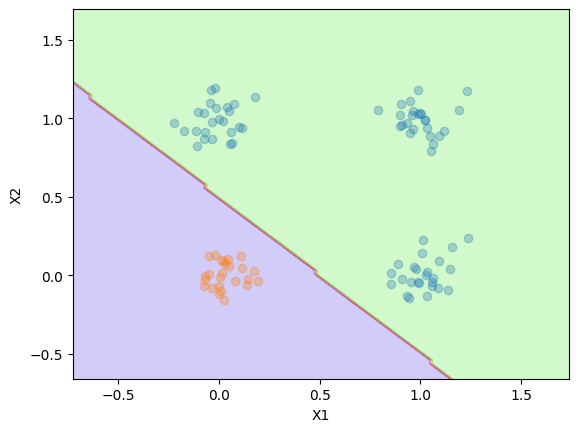

In [6]:
X, y = criaDataset()
plotDataset(X, y)
clf = ClassificadorOR()
plotPredictions(clf, X)
accuracy_score(y, clf.predict(X))

1.0

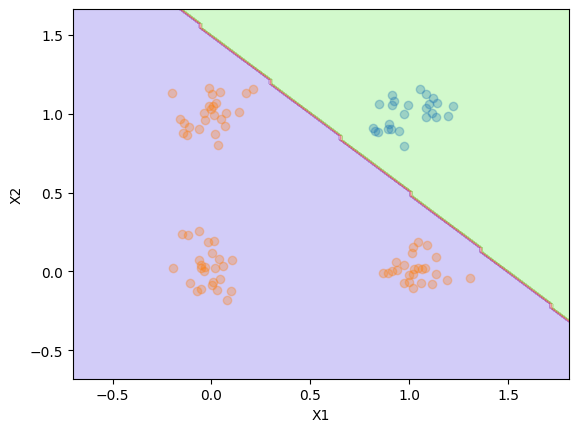

In [7]:
X, y = criaDataset(100, lambda a, b: bool(a) and bool(b))
plotDataset(X, y)
class ClassificadorAND(BaseEstimator, ClassifierMixin):
  def fit(self, X, y):
    pass
  def predict(self, X):
    w = [-1.5, 1, 1]
    Xb = include_bias(X)
    return sign(Xb @ w)

clf = ClassificadorAND()
plotPredictions(clf, X)
accuracy_score(y, clf.predict(X))

1.0

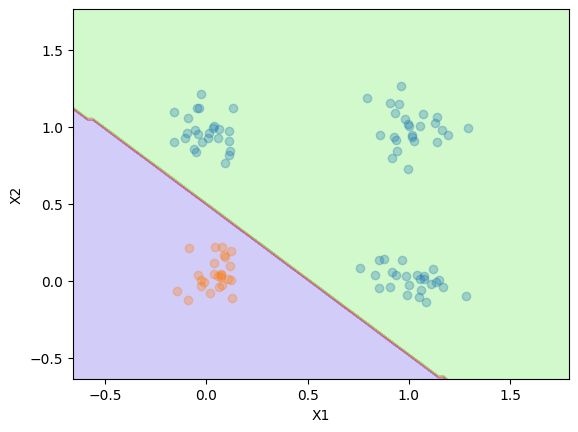

In [8]:
class ClassificadorLinear(BaseEstimator, ClassifierMixin):
  def __init__(self, max_iter=100, learning_rate=0.005):
    self.max_iter = max_iter
    self.learning_rate = learning_rate

  def fit(self, X, y):
    Xb = include_bias(X)
    self.w = np.random.uniform(-1, 1, size=(Xb.shape[1], 1))
    for _ in range(self.max_iter):
      ypred = Xb @ self.w
      erros = y.reshape(-1, 1) - ypred.reshape(-1, 1)
      self.w += (Xb.T @ erros) * self.learning_rate

  def predict(self, X):
    Xb = include_bias(X)
    return sign(Xb @ self.w)

X, y = criaDataset()
plotDataset(X, y)
clf = ClassificadorLinear()
clf.fit(X, y)
plotPredictions(clf, X)
accuracy_score(y, clf.predict(X))

1.0

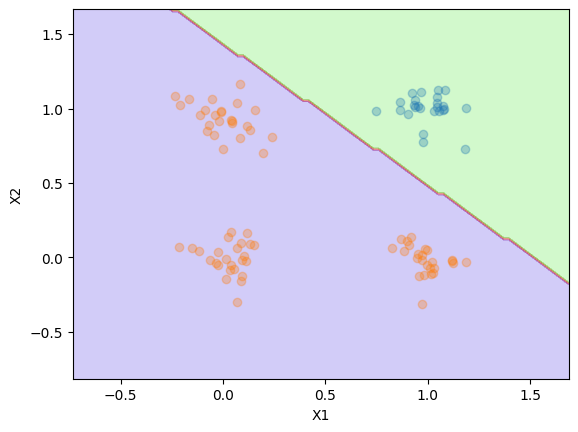

In [9]:
X, y = criaDataset(100, lambda a, b: bool(a) and bool(b))
plotDataset(X, y)
clf = ClassificadorLinear()
clf.fit(X, y)
plotPredictions(clf, X)
accuracy_score(y, clf.predict(X))

0.52

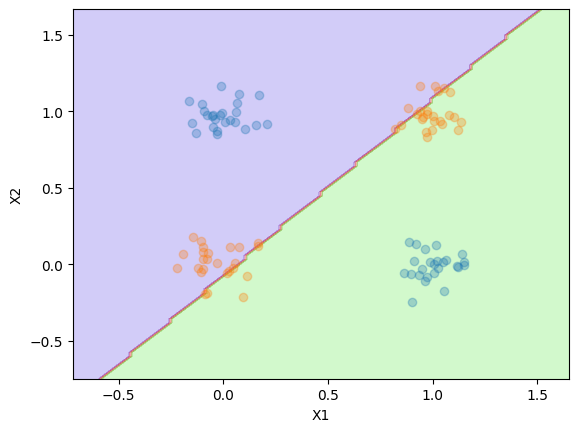

In [10]:
X, y = criaDataset(100, lambda a, b: bool(a) != bool(b))
plotDataset(X, y)
clf = ClassificadorLinear()
clf.fit(X, y)
plotPredictions(clf, X)
accuracy_score(y, clf.predict(X))

1.0


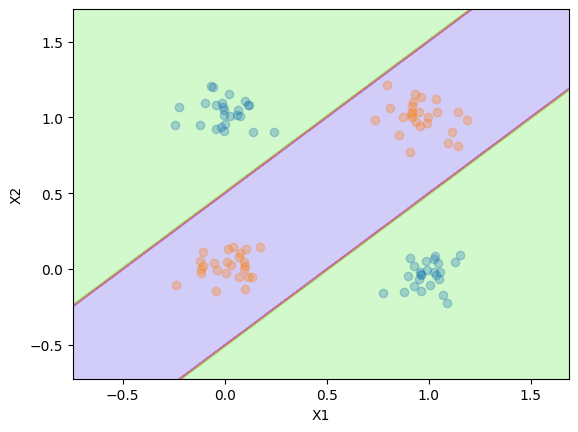

In [11]:
X, y = criaDataset(100, lambda a, b: bool(a) != bool(b))
plotDataset(X, y)
class ClassificadorXOR(BaseEstimator, ClassifierMixin):
  def fit(self, X, y):
    pass
  def predict(self, X):
    Xb = include_bias(X)
    ihw = np.array([[0.5, -1, 1], [0.5, 1, -1]]).T
    self.pH = (Xb @ ihw)
    self.H = sign(self.pH)
    Hb = include_bias(self.H)
    how = np.array([1, -1, -1])
    return sign(Hb @ how)

clf = ClassificadorXOR()
plotPredictions(clf, X)
print(accuracy_score(y, clf.predict(X)))

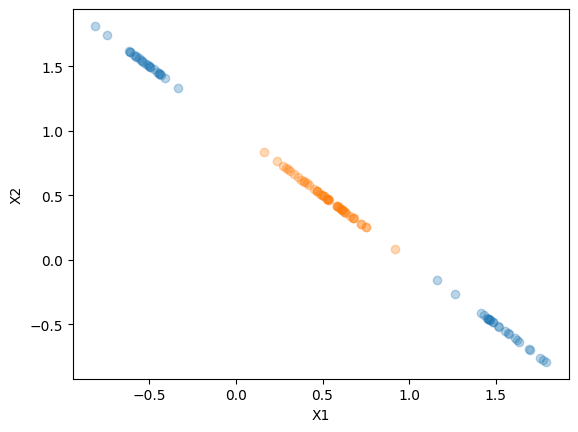

In [12]:
plotDataset(clf.pH, y)

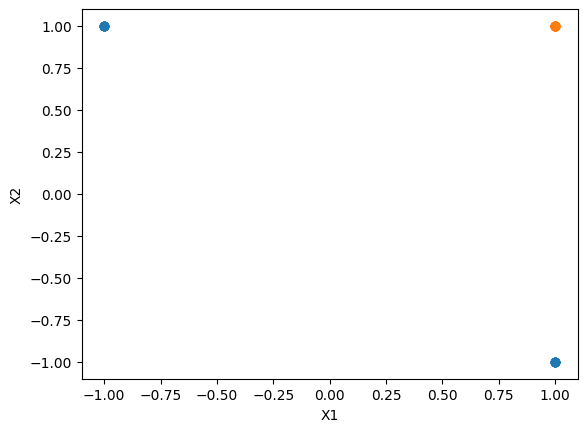

In [13]:
plotDataset(clf.H, y)

In [14]:
from scipy.special import expit

def tanh(a):
  return expit(a)*2-1

1.0


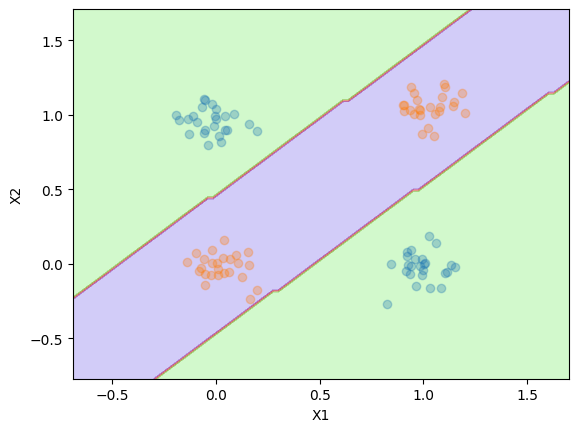

In [15]:
X, y = criaDataset(100, lambda a, b: bool(a) != bool(b))
plotDataset(X, y)
class ClassificadorXOR(BaseEstimator, ClassifierMixin):
  def fit(self, X, y):
    self.ihw = np.array([[1.74, -0.9, 0.9], [1.74, 0.9, -0.9]]).T
    self.how = np.array([1.234, -0.9, -0.9])

  def predict(self, X):
    Xb = include_bias(X)
    self.pH = (Xb @ self.ihw)
    self.H = tanh(self.pH)
    Hb = include_bias(self.H)
    return sign(Hb @ self.how)

clf = ClassificadorXOR()
clf.fit(X, y)
plotPredictions(clf, X)
print(accuracy_score(y, clf.predict(X)))

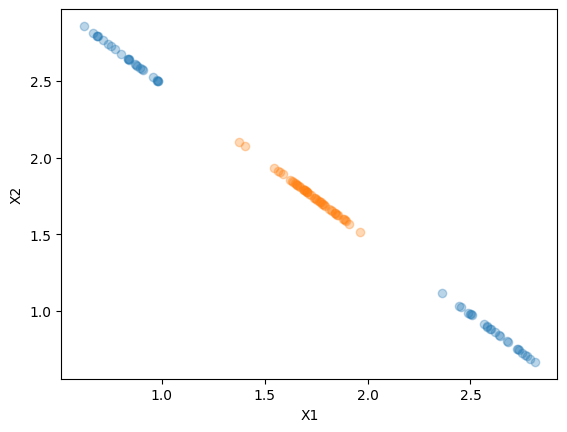

In [16]:
plotDataset(clf.pH, y)

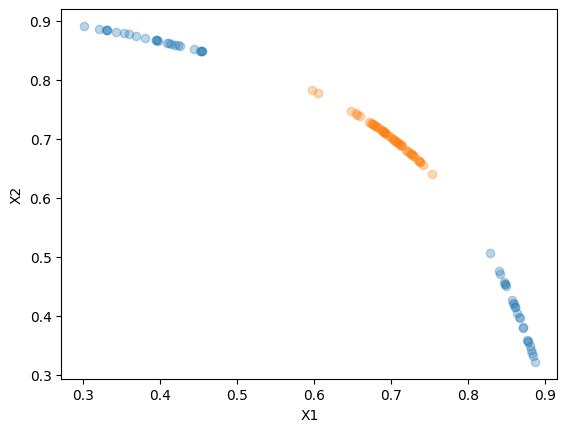

In [17]:
plotDataset(clf.H, y)

0.99


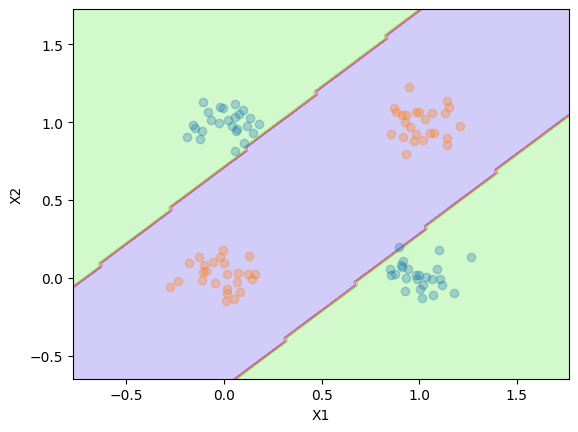

In [18]:
X, y = criaDataset(100, lambda a, b: bool(a) != bool(b))
plotDataset(X, y)
class ClassificadorXOR(BaseEstimator, ClassifierMixin):
  def __init__(self, max_iter=1000, learning_rate=0.005):
    self.max_iter = max_iter
    self.learning_rate = learning_rate

  def fit(self, X, y):
    Xb = include_bias(X)
    self.ihw = np.array([[1.74, -0.9, 0.9], [1.74, 0.9, -0.9]]).T
    self.pH = (Xb @ self.ihw)
    self.H = tanh(self.pH)
    Hb = include_bias(self.H)
    self.how = np.random.uniform(-1, 1, size=(Xb.shape[1], 1))
    for _ in range(self.max_iter):
      ypred = Hb @ self.how
      erros = y.reshape(-1, 1) - ypred.reshape(-1, 1)
      self.how += (Hb.T @ erros) * self.learning_rate

  def predict(self, X):
    Xb = include_bias(X)
    self.pH = (Xb @ self.ihw)
    self.H = tanh(self.pH)
    Hb = include_bias(self.H)
    return sign(Hb @ self.how)

clf = ClassificadorXOR()
clf.fit(X, y)
plotPredictions(clf, X)
print(accuracy_score(y, clf.predict(X)))

1.0


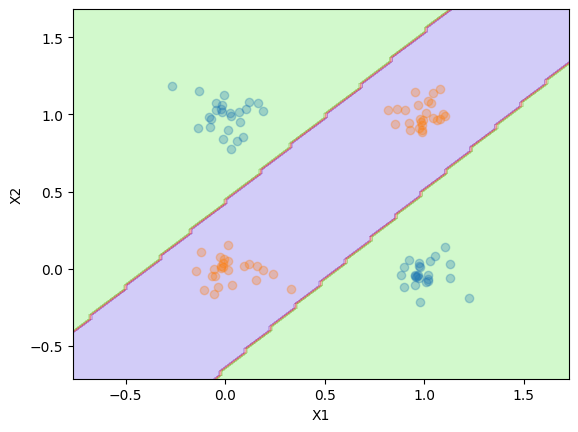

In [19]:
X, y = criaDataset(100, lambda a, b: bool(a) != bool(b))
plotDataset(X, y)
class SingleHiddenLayer(BaseEstimator, ClassifierMixin):
  def __init__(self, max_iter=1000, learning_rate=0.005):
    self.max_iter = max_iter
    self.learning_rate = learning_rate

  def forward(self, X):
    self.pH = X @ self.ihw
    self.H = tanh(self.pH)
    self.Hb = include_bias(self.H)
    return self.Hb @ self.how

  def backward(self, X, y, ypred):
    ho_delta = y.reshape(-1,1) - ypred.reshape(-1,1)
    ho_grad = self.Hb.T @ ho_delta
    ### PULO DO GATO ###
    tanh_grad = (1 - np.square(self.H))
    ih_delta = (ho_delta @ self.how[1:,:].T) * tanh_grad
    ### #### ## #### ###
    ih_grad = X.T @ ih_delta
    self.how += ho_grad * self.learning_rate
    self.ihw += ih_grad * self.learning_rate

  def fit(self, X, y):
    Xb = include_bias(X)
    self.ihw = np.random.uniform(-1, 1, size=(Xb.shape[1], 2))
    self.how = np.random.uniform(-1, 1, size=(2+1, 1))
    for _ in range(self.max_iter):
      ypred = self.forward(Xb)
      self.backward(Xb, y, ypred)

  def predict(self, X):
    Xb = include_bias(X)
    self.pH = (Xb @ self.ihw)
    self.H = tanh(self.pH)
    Hb = include_bias(self.H)
    return sign(Hb @ self.how)

clf = SingleHiddenLayer()
clf.fit(X, y)
plotPredictions(clf, X)
print(accuracy_score(y, clf.predict(X)))

1.0
[[-1.09692215  1.11761507]
 [-4.58109816 -3.30985107]
 [ 4.14771798  2.94145092]]


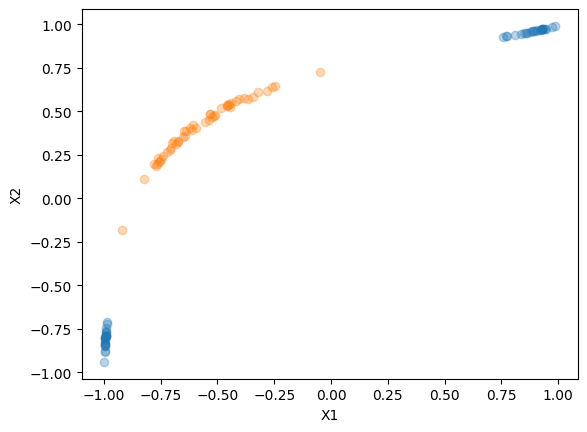

In [20]:
clf.fit(X, y)
print(accuracy_score(y, clf.predict(X)))
print(clf.ihw)
plotDataset(clf.H, y)

1.0

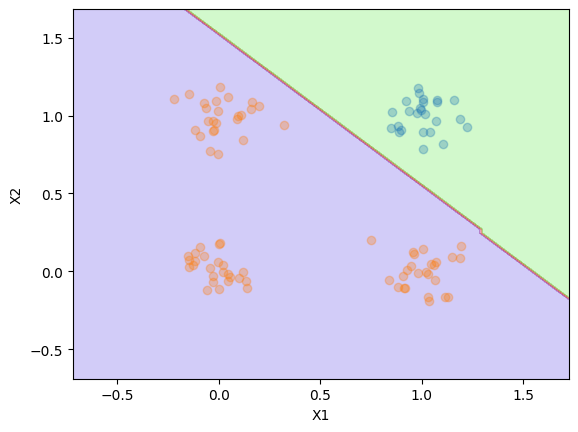

In [21]:
X, y = criaDataset(100, lambda a, b: bool(a) and bool(b))
plotDataset(X, y)
clf = SingleHiddenLayer()
clf.fit(X, y)
plotPredictions(clf, X)
accuracy_score(y, clf.predict(X))

1.0

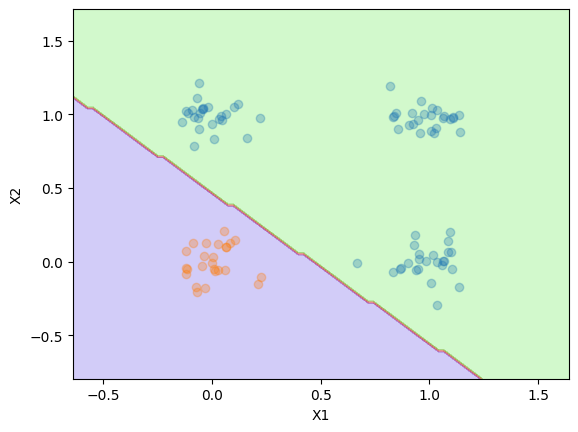

In [22]:
X, y = criaDataset(100, lambda a, b: bool(a) or bool(b))
plotDataset(X, y)
clf = SingleHiddenLayer()
clf.fit(X, y)
plotPredictions(clf, X)
accuracy_score(y, clf.predict(X))